In [2]:
pip install google

                                              0.0/45.3 kB ? eta -:--:--
     -------------------------------------- 45.3/45.3 kB 761.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [20]:
df = pd.read_csv('/Users/rajathadri_as/Documents/visitors-overview - CFS_conversions_2018.csv')

In [21]:
df.head()

,mon,yr,SUM(views),SUM(contacts),SUM(print_phone),SUM(print_click),SUM(cost),Users,ad_count
0,8,2018,16221,39,59,564,0,95893,14
1,9,2018,49589,47,95,843,0,74567,23
2,10,2018,4478,4,6,63,0,59312,2
3,11,2018,5942,5,6,71,0,52613,2
4,12,2018,4121,9,10,70,0,33943,2


In [ ]:
# Set the first row as column names
# df.columns = df.iloc[0]
# df = df[1:].reset_index(drop=True)

In [22]:
df.head()

,mon,yr,SUM(views),SUM(contacts),SUM(print_phone),SUM(print_click),SUM(cost),Users,ad_count
0,8,2018,16221,39,59,564,0,95893,14
1,9,2018,49589,47,95,843,0,74567,23
2,10,2018,4478,4,6,63,0,59312,2
3,11,2018,5942,5,6,71,0,52613,2
4,12,2018,4121,9,10,70,0,33943,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   mon               59 non-null     int64
 1   yr                59 non-null     int64
 2   SUM(views)        59 non-null     int64
 3   SUM(contacts)     59 non-null     int64
 4   SUM(print_phone)  59 non-null     int64
 5   SUM(print_click)  59 non-null     int64
 6   SUM(cost)         59 non-null     int64
 7   Users             59 non-null     int64
 8   ad_count          59 non-null     int64
dtypes: int64(9)
memory usage: 4.3 KB


In [24]:
df.rename(columns = {'mon':'month', 'SUM(views)':'views', 'SUM(contacts)':'contacts', 'SUM(print_phone)':'phone', 'SUM(print_click)':'print', 'SUM(cost)':'cost'}, inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   month     59 non-null     int64
 1   yr        59 non-null     int64
 2   views     59 non-null     int64
 3   contacts  59 non-null     int64
 4   phone     59 non-null     int64
 5   print     59 non-null     int64
 6   cost      59 non-null     int64
 7   Users     59 non-null     int64
 8   ad_count  59 non-null     int64
dtypes: int64(9)
memory usage: 4.3 KB


In [43]:
df.groupby('yr').aggregate(np.sum)

,month,views,contacts,phone,print,cost,Users,ad_count
yr,,,,,,,,
2018,50,80351,104,176,1611,0,316328,43
2019,67,115093,174,244,3627,0,894716,81
2020,73,247424,475,1279,5943,0,1288466,252
2021,78,350187,798,1208,5681,0,1313375,466
2022,78,1602861,1197,2168,12226,102641,1274857,3381
2023,36,2637987,5738,9636,10020,1120077,1272795,16077


In [26]:
# Define the function
def calculate_ratio(year, input_feature):
    grouped = df[df['yr'] == year].groupby('yr')[input_feature].sum()
    first_value = grouped.values[0]
    total_users = df[df['yr'] == year]['Users'].sum()
    ratio = first_value / total_users
    return ratio

In [27]:
input_year = 2019
input_feature = 'views'
result_ratio = calculate_ratio(input_year, input_feature)
result_ratio

0.12863634941143334

In [28]:
# Create a list of features to calculate ratios for
features_to_calculate = ['views', 'contacts', 'phone', 'print', 'cost','ad_count']

# Create an empty list to hold the calculated ratios
ratios_list = []

In [29]:
# Loop through each year and feature, calculate ratio, and store in the list
for year in df['yr'].unique():
    for feature in features_to_calculate:
        ratio = calculate_ratio(year, feature)
        ratios_list.append({'Year': year, 'Feature': feature, 'Ratio': ratio})

In [30]:
# Create a new DataFrame from the ratios list
ratios_df = pd.DataFrame(ratios_list)

In [31]:
ratios_df

,Year,Feature,Ratio
0,2018,views,0.254012
1,2018,contacts,0.000329
2,2018,phone,0.000556
3,2018,print,0.005093
4,2018,cost,0.000000
5,2018,ad_count,0.000136
6,2019,views,0.128636
7,2019,contacts,0.000194
8,2019,phone,0.000273
9,2019,print,0.004054


In [32]:
# Pivot the DataFrame to create the tabulated result
tabulated_df = ratios_df.pivot(index='Year', columns='Feature', values='Ratio')

In [33]:
tabulated_df

Feature,ad_count,contacts,cost,phone,print,views
Year,,,,,,
2018,0.000136,0.000329,0.000000,0.000556,0.005093,0.254012
2019,0.000091,0.000194,0.000000,0.000273,0.004054,0.128636
2020,0.000196,0.000369,0.000000,0.000993,0.004612,0.192030
2021,0.000355,0.000608,0.000000,0.000920,0.004325,0.266631
2022,0.002652,0.000939,0.080512,0.001701,0.009590,1.257287
2023,0.012631,0.004508,0.880014,0.007571,0.007872,2.072594


In [54]:
# Define the function to calculate ratio
def calculate_ratio(year, month, input_feature):
    grouped = df[(df['yr'] == year) & (df['month'] == month)].groupby(['yr', 'month'])[input_feature].sum()
    total_users = df[(df['yr'] == year) & (df['month'] == month)]['Users'].sum()
    ratio = grouped.values[0] / total_users
    return ratio

# Create a list of features to calculate ratios for
features_to_calculate = ['views', 'contacts', 'phone', 'print', 'cost','ad_count']

# Create an empty list to hold the calculated ratios
ratios_list = []

# Loop through each year, month, and feature, calculate ratio, and store in the list
for year in df['yr'].unique():
    for month in df[df['yr'] == year]['month'].unique():
        for feature in features_to_calculate:
            ratio = calculate_ratio(year, month, feature)
            ratios_list.append({'Year': year, 'Month': month, 'Feature': feature, 'Ratio': ratio})

# Create a new DataFrame from the ratios list
ratios_df = pd.DataFrame(ratios_list)

# Pivot the DataFrame to create the tabulated result
tabulated_df = ratios_df.pivot(index=['Year', 'Month'], columns='Feature', values='Ratio')

print(tabulated_df)

Feature     ad_count  contacts      cost     phone     print     views
Year Month                                                            
2018 8      0.000146  0.000407  0.000000  0.000615  0.005882  0.169157
     9      0.000308  0.000630  0.000000  0.001274  0.011305  0.665026
     10     0.000034  0.000067  0.000000  0.000101  0.001062  0.075499
     11     0.000038  0.000095  0.000000  0.000114  0.001349  0.112938
     12     0.000059  0.000265  0.000000  0.000295  0.002062  0.121409
2019 1      0.000015  0.000015  0.000000  0.000015  0.000220  0.001819
     2      0.000319  0.000486  0.000000  0.000713  0.014809  0.418093
     3      0.000038  0.000025  0.000000  0.000051  0.002168  0.070145
     4      0.000042  0.000095  0.000000  0.000105  0.001642  0.046239
     5      0.000042  0.000000  0.000000  0.000031  0.001957  0.036126
     6      0.000090  0.000237  0.000000  0.000451  0.004317  0.175806
     7      0.000050  0.000030  0.000000  0.000060  0.002737  0.118245
     8

In [56]:
# Groupby Year and Month and calculate sum of 'ad_count'
grouped_df = df.groupby(['yr', 'month'])['ad_count'].sum().reset_index()
grouped_df

,yr,month,ad_count
0,2018,8,14
1,2018,9,23
2,2018,10,2
3,2018,11,2
4,2018,12,2
5,2019,1,1
6,2019,2,21
7,2019,3,3
8,2019,4,4
9,2019,5,4


In [60]:
grouped_df.rename(columns = {'yr':'Year', 'month':'Month'}, inplace = True)

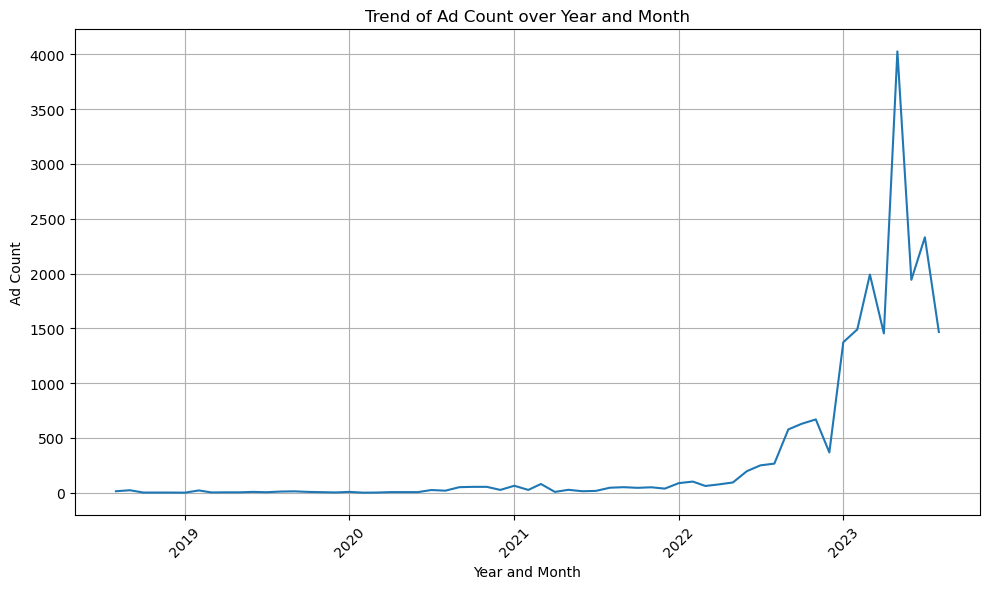

In [63]:
# Convert 'Year' and 'Month' to datetime format
grouped_df['YearMonth'] = pd.to_datetime(grouped_df[['Year', 'Month']].assign(day=1))

# Sort the dataframe by 'YearMonth'
grouped_df = grouped_df.sort_values('YearMonth')

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['YearMonth'], grouped_df['ad_count'])
plt.title('Trend of Ad Count over Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Ad Count')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
features_to_plot = ['contacts', 'phone', 'print', 'views']

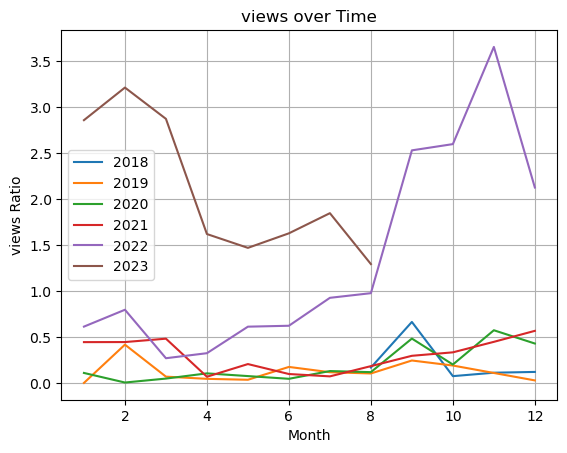

In [53]:
for year in tabulated_df['Year'].unique():
    subset = tabulated_df[tabulated_df['Year'] == year]
    plt.plot(subset['Month'], subset[feature], label=str(year))

plt.title(f'{feature} over Time')
plt.xlabel('Month')
plt.ylabel(f'{feature} Ratio')
plt.legend()
plt.grid()
plt.show()